<h1>Model to predict number of death in the American Regions due to Covid-19 Pandemic</h1>

### By Samuel Mugisha   RegNo:  MAY21/COMP/563U

### Extract the dataset

In [18]:
#import the global dataset using pandas DataFrame for IBM Watson code


import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_b62ff84c1aa649748576bb89dc676db9 = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_b62ff84c1aa649748576bb89dc676db9 = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_b62ff84c1aa649748576bb89dc676db9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='J88muyF0hWSaK1rWvhgL0HQBMq1qeqD-O4KPIJM7dGyX',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_b62ff84c1aa649748576bb89dc676db9)

body = client_b62ff84c1aa649748576bb89dc676db9.get_object(Bucket='implementingquicksort-donotdelete-pr-3hswopdmfzpvwa',Key='WHO-COVID-19-global-data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


### Extract data for only American Region i.e AMRO

In [19]:
df = df_data_1.loc[df_data_1['WHO_region'] == 'AMRO']
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
4224,2020-01-03,AI,Anguilla,AMRO,0,0,0,0
4225,2020-01-04,AI,Anguilla,AMRO,0,0,0,0
4226,2020-01-05,AI,Anguilla,AMRO,0,0,0,0
4227,2020-01-06,AI,Anguilla,AMRO,0,0,0,0
4228,2020-01-07,AI,Anguilla,AMRO,0,0,0,0


In [21]:
df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
163323,2021-12-02,VE,Venezuela (Bolivarian Republic of),AMRO,649,431945,11,5155
163324,2021-12-03,VE,Venezuela (Bolivarian Republic of),AMRO,569,432514,6,5161
163325,2021-12-04,VE,Venezuela (Bolivarian Republic of),AMRO,694,433208,9,5170
163326,2021-12-05,VE,Venezuela (Bolivarian Republic of),AMRO,452,433660,7,5177
163327,2021-12-06,VE,Venezuela (Bolivarian Republic of),AMRO,473,434133,9,5186


In [23]:
df.shape

(39424, 8)

### Data Analysis

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,39424.000000,3.942400e+04,39424.000000,39424.000000
mean,2478.239778,6.943558e+05,59.876395,18682.048625
std,13513.811226,3.730033e+06,266.892118,78378.659648
min,-32952.000000,0.000000e+00,-43.000000,0.000000
25%,0.000000,3.500000e+01,0.000000,0.000000
50%,4.000000,2.725000e+03,0.000000,34.000000
75%,341.000000,7.042650e+04,6.000000,1546.500000
max,293566.000000,4.870238e+07,8786.000000,781265.000000


#### Check for missing values for all coloumns

In [29]:
print("Number of missing values for Date_reported :", df['Date_reported'].isnull().sum())
print("Number of missing values for Country_code :", df['Country_code'].isnull().sum())
print("Number of missing values for Country : ", df['Country'].isnull().sum())
print("Number of missing values for WHO_region :", df['WHO_region'].isnull().sum())
print("Number of missing values for New_cases :", df['New_cases'].isnull().sum())
print("Number of missing values for Cumulative_cases:", df['Cumulative_cases'].isnull().sum())
print("Number of missing values for New_deaths :", df['New_deaths'].isnull().sum())
print("Number of missing values for Cumulative_deaths:", df['Cumulative_deaths'].isnull().sum())

Number of missing values for Date_reported : 0
Number of missing values for Country_code : 0
Number of missing values for Country :  0
Number of missing values for WHO_region : 0
Number of missing values for New_cases : 0
Number of missing values for Cumulative_cases: 0
Number of missing values for New_deaths : 0
Number of missing values for Cumulative_deaths: 0


#### Exploring the dataset

In [127]:
df[['Country','Country_code']].value_counts().to_frame()

,,0
Country,Country_code,
Anguilla,AI,704
Antigua and Barbuda,AG,704
Honduras,HN,704
Jamaica,JM,704
Martinique,MQ,704
Mexico,MX,704
Montserrat,MS,704
Nicaragua,NI,704
Panama,PA,704


## Model Development with linear regression

#### Fit a linear regression model using the cumulative cases feature and caculate the R^2 for cumulative deaths

In [33]:
#Import libraries 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression 
%matplotlib inline

In [34]:
X = df[['Cumulative_cases']] 
Y = df['Cumulative_deaths'] 
lm = LinearRegression() 
lm.fit(X,Y)
lm.score(X, Y)

0.8742896824019513

#### How could identified cases help us predict deaths?

In [55]:
X = df[['New_cases']]
Y = df['New_deaths'] 
lm = LinearRegression() 
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat

array([19.43542019, 19.43542019, 19.43542019, ..., 30.76040853,
       26.8113492 , 27.15403616])

#### Value of Intercept

In [56]:
lm.intercept_

19.435420194233956

#### Value of the Coeficient

In [57]:
lm.coef_

array([0.01631843])

### Linear model from Yhat = aX + b becomes Yhat = 0.01964775X + 5039.518439242598   where X is the cumulative cases

#### Plot the the linear graph of cumulative Death over Cumulative cases

In [67]:
df.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

In [71]:
df.corr()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
New_cases,1.000000,0.709068,0.826267,0.668966
Cumulative_cases,0.709068,1.000000,0.598194,0.935035
New_deaths,0.826267,0.598194,1.000000,0.646720
Cumulative_deaths,0.668966,0.935035,0.646720,1.000000


(0.0, 1026645.557168985)

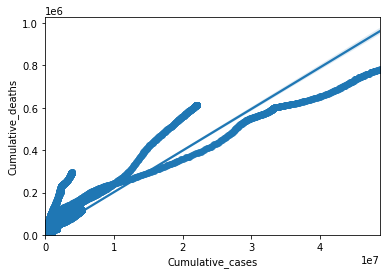

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.regplot(x="Cumulative_cases", y="Cumulative_deaths", data=df)
plt.ylim(0,)

<AxesSubplot:xlabel='Date_reported', ylabel='New_deaths'>

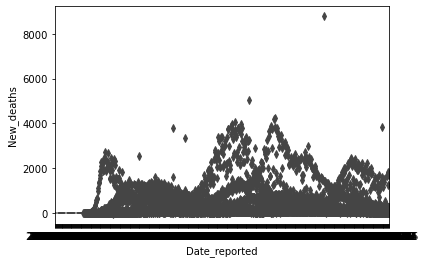

In [80]:
# box plot of new death for every report date

sns.boxplot(x="Date_reported", y="New_deaths", data=df)

<AxesSubplot:xlabel='Date_reported', ylabel='New_cases'>

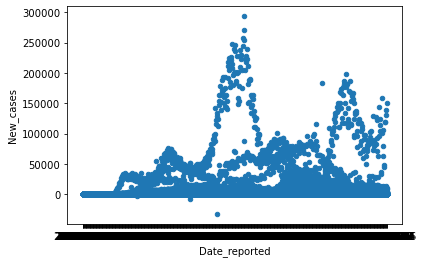

In [83]:
#scatter diagram of New cases against date


import matplotlib.pyplot as plt

df.plot.scatter(x='Date_reported',
                      y='New_cases')

<AxesSubplot:xlabel='Country', ylabel='New_cases'>

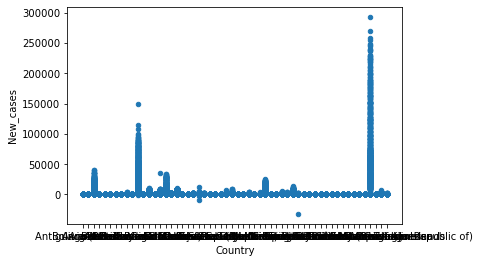

In [84]:
#scatter diagram of New cases against Country


import matplotlib.pyplot as plt

df.plot.scatter(x='Country',
                      y='New_cases')

<AxesSubplot:xlabel='Country', ylabel='New_deaths'>

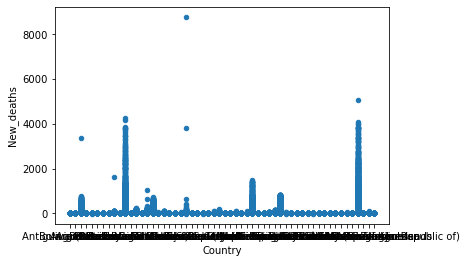

In [85]:
#scatter diagram of New Death against Country


import matplotlib.pyplot as plt

df.plot.scatter(x='Country',
                      y='New_deaths')

<AxesSubplot:xlabel='New_cases', ylabel='New_deaths'>

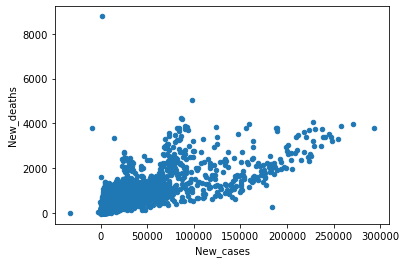

In [86]:
#scatter diagram of New Death against New cases


import matplotlib.pyplot as plt

df.plot.scatter(x='New_cases',
                      y='New_deaths')

### Measures for In-Sample Evaluation of Linear Regression

#### R squared (coefficient of determination)  is a measure to indicate how close the data is to the fitted regression line. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

In [87]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
4224,2020-01-03,AI,Anguilla,AMRO,0,0,0,0
4225,2020-01-04,AI,Anguilla,AMRO,0,0,0,0
4226,2020-01-05,AI,Anguilla,AMRO,0,0,0,0
4227,2020-01-06,AI,Anguilla,AMRO,0,0,0,0
4228,2020-01-07,AI,Anguilla,AMRO,0,0,0,0


In [88]:
X = df[['Cumulative_cases']] 
Y = df['Cumulative_deaths'] 
lm = LinearRegression() 
lm 
lm.fit(X,Y)
lm.score(X, Y)

0.8742896824019513

 #### ~ 87.4% of the variation of the Deaths is explained by this simple linear model.

<h3>Mean Squared Error (MSE)</h3>
The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

In [89]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [5039.51843924 5039.51843924 5039.51843924 5039.51843924]


In [90]:
# import the function mean_squared_error from the module metrics
from sklearn.metrics import mean_squared_error

<b> We compare the predicted results with the actual results. </b>

In [91]:
mse = mean_squared_error(df['Cumulative_deaths'], Yhat)
print('The mean square error of Cumulative deaths and predicted value is: ', mse)

The mean square error of Cumulative deaths and predicted value is:  772245830.5290835


<h2> Multiple Linear Regression</h2>

<p> If we want to use more variables in our model to predict Deaths, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using 4 predictor variables.</p>

<b> 
Let's develop a model using these variables as the predictor variables.</b>

In [101]:
Z = df[['New_cases', 'Cumulative_cases', 'New_deaths']]

In [102]:
lm.fit(Z, df['Cumulative_deaths'])

LinearRegression()

In [103]:
#Value of intercept
lm.intercept_

3532.877600427397

In [107]:
7.64948430e+01

76.494843

In [104]:
#coeficient
lm.coef_

array([-1.15218625e+00,  1.93335018e-02,  7.64948430e+01])

<b>Multi Linear model from becomes Yhat = -1.15218625 * New_cases + 0.0193335018*Cumulative_cases + 76.494843* New_deaths  + 3532.877600427397</b>

<h2> Measures for In-Sample Evaluation of Multiple Linear Regression</h2>

### R^2 for Multiple Linear Regression

In [108]:
# fit the model 
lm.fit(Z, df['Cumulative_deaths'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['Cumulative_deaths']))

The R-square is:  0.8958676700640632


 #### ~ 89.6 % of the variation of Cumulative_deaths is explained by this multiple linear regression "multi_fit"

<b> Let's calculate the MSE for Multiple linear Regression</b>

In [109]:
Y_predict_multifit = lm.predict(Z)

In [110]:
#We compare the predicted results with the actual results
print('The mean square error of Cumulative deaths and predicted value using multifit is: ', \
      mean_squared_error(df['Cumulative_deaths'], Y_predict_multifit))

The mean square error of Cumulative deaths and predicted value using multifit is:  639690990.785901


### Concusion

<p>Comparing these three models, we conclude that the Multiple Linear Regression model is the best model to be able to predict Deaths from our dataset. This result makes sense, since we have 3 variables in total, and we know that more than one of those variables are potential predictors of the final numbers of Deaths.</p>